# Projeto Final | Sistema para Edição de imagens e áudios

<div style="background-color: #f2f2f2; text-align: center; padding: 10px;">
  <h3>Script para edição de áudios</h3>
</div>

%------------------------------------------------------------------------------------------------------%<br>
<br>
``Autores:`` Andrea Elias, Anthony Heimlich, Éverton Donato, Julia Midori e Luana Kruger  <br>
<br>
``Instituição:`` ADA Tech<br>
<br>
``Projeto:`` Santander Coders 2023.2<br>
<br>
``Descrição:`` Este código implementa um sistema de edição de áudios e registra informações sobre as manipulações feitas em um arquivo de log<br>
<br>
``Repositório GitHub:`` https://github.com/luana-kruger/TP-I_Santander_Coders23  <br>
<br>

%------------------------------------------------------------------------------------------------------%

## Carregar bibliotecas

In [24]:
import csv
import os
from datetime import datetime
import numpy as np
import random
import pandas as pd
import matplotlib.pylab as plt

import tensorflow as tf
import seaborn as sns
import librosa
import librosa.display
import scipy.io.wavfile as wav
from IPython.display import Audio
import IPython


import pathlib
import glob

## Carregar Funções

### Função para criar ou abrir arquivo de log


In [2]:
def criar_ou_abrir_arquivo_log():

    arquivo_existe = os.path.isfile('\logs\log_audio.csv')
    modo = 'a' if arquivo_existe else 'w'
    arquivo_log = open('\logs\log_audio.csv', modo, newline='')
    
    return csv.DictWriter(arquivo_log, 
                          fieldnames=['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 
                                      'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 
                                      'Mensagem de Erro']
                        )


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\antho\AppData\Local\Temp\ipykernel_11024\1568679770.py:3: SyntaxWarning: invalid escape sequence '\l'
  arquivo_existe = os.path.isfile('\logs\log_audio.csv')
C:\Users\antho\AppData\Local\Temp\ipykernel_11024\1568679770.py:5: SyntaxWarning: invalid escape sequence '\l'
  arquivo_log = open('\logs\log_audio.csv', modo, newline='')


### Função para registrar log

In [3]:
def registrar_log(arquivo_log, tipo_processamento, tempo_processamento, nome_arquivo, tamanho_arquivo, resultado, mensagem_erro):
    
    data_hora = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    arquivo_log.writerow({'Data e Hora': data_hora,  
                          'Tipo de Processamento': tipo_processamento, 
                          'Tempo de Processamento': tempo_processamento, 
                          'Nome do Arquivo': nome_arquivo, 
                          'Tamanho do Arquivo': tamanho_arquivo, 
                          'Resultado do Processamento': resultado, 
                          'Mensagem de Erro': mensagem_erro})


### Função Ler arquivo WAV

In [4]:
def ler_arquivo_wav(path, arquivo_log):
    
    tipo_process = 'Leitura de Arquivo WAV'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        audio_data, rate = librosa.load(path)

        tempo_fim = datetime.now()

        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return rate, audio_data
    
    except Exception as erro:

        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))
        
        return None

### Função Inversão de Áudio

In [5]:
## Essa função inverte o áudio original

def inversao_audio(audio_data, path, arquivo_log):
    tipo_process = 'Inversão de Áudio'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB
    try:

        tempo_inicio = datetime.now()

        audio_invertido = audio_data[::-1]

        tempo_fim = datetime.now()
        
        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000 

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return audio_invertido
    
    except Exception as erro:

        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))

        return None

### Função Convolução de Áudio


In [6]:
## Convolução é uma operação matemática comum em processamento de sinais que combina duas 
## funções para produzir uma terceira, representando como uma é afetada pela outra ao longo do tempo.

def convolucao_audio(audio_data, path, arquivo_log):

    tipo_process = 'Convolução de Áudio'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:

        tempo_inicio = datetime.now()

        f_trans = np.poly1d([1], True)
        audio_conv = np.convolve(audio_data, f_trans)

        tempo_fim = datetime.now()
        
        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000 

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return audio_conv
    
    except Exception as erro:

        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))

        return None


### Função Normalização de Áudio


In [7]:
''' 
Utilizando a biblioteca Librosa, o audio que é carregado já está normalizado. 
Isso significa que os valores de amplitude do sinal foram ajustados para estar dentro da faixa de -1 a 1.
Caso não estivessemos utilizando a biblioteca Librosa, fariamos algo parecido com o código a seguir para normalizar
'''

def audio_normalizado(audio_data):
    audio_normalizado = audio_data / np.max(np.abs(audio_data))
    return audio_normalizado


### Função Recorte de Áudio


In [8]:
## Essa função recorta um áudio em 2 partes

def recortar_audio(audio_data, inicio, fim, path, arquivo_log):

    tipo_process = 'Recorte de Áudio'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        # Em segundos
        tempo_audio_inicio = inicio  
        tempo_audio_fim = fim
          
        # Converte os tempos de início e fim para amostras
        amostra_inicio = librosa.time_to_samples(tempo_audio_inicio, sr=rate)
        amostra_fim = librosa.time_to_samples(tempo_audio_fim, sr=rate)

        audio_cortado = audio_data[amostra_inicio:amostra_fim] 

        tempo_fim = datetime.now()
        
        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000 

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return audio_cortado
    
    except Exception as erro:

        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))

        return None

### Função Concatenar Áudios


In [9]:
## Essa função concatena 2 áudios

def concatenar_audio(audio_data, audio_data2, path, arquivo_log):

    tipo_process = 'Concatenação de Áudio'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        audio_concatenado = np.concatenate((audio_data, audio_data2))

        tempo_fim = datetime.now()
        
        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000 

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return audio_concatenado
    
    except Exception as erro:

        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))

        return None

### Função Misturar Áudios


In [10]:
## Essa função mistura 2 áudios

def misturar_audio(audio_data, audio_data2, path, arquivo_log):

    tipo_process = 'Mistura de Áudio'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        audio_misturado = audio_data + audio_data2

        tempo_fim = datetime.now()
        
        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000 

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return audio_misturado
    
    except Exception as erro:

        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))

        return None

### Função Filtrar Ruído de Áudio

In [11]:
## Essa função filtra o ruído de um áudio

def filtrar_audio(audio_data, path, arquivo_log):

    tipo_process = 'Filtragem de Áudio'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        # Como o audio extraido pelo librosa já está normalizado, os valores podem estar apenas na faixa de -1 e 1
        limiar = 0.05    
        # Substitui os valores de amplitude que estão abaixo do limiar por zero
        audio_filtrado = np.where(np.abs(audio_data) < limiar, 0, audio_data)

        tempo_fim = datetime.now()
        
        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000 

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return audio_filtrado
    
    except Exception as erro:

        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))

        return None

## Espectograma

### Transformação de Fourier de curto tempo (STFT)


In [12]:
'''
Utilizada para analisar sinais em termos de suas componentes de frequência, a ideia básica por trás da STFT é dividir
o sinal de entrada em pequenos segmentos de tempo, geralmente chamados de janelas. 
Em seguida, a Transformação de Fourier é aplicada a cada uma dessas janelas individuais. Isso resulta 
em uma representação do sinal em intervalos de tempo discretos
''' 

## Parametros

path = './audio_test.wav'
audio_data, rate = librosa.load(path)
D = librosa.stft(audio_data)   # Divide o áudio nas "janelas"
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)   # Converte a amplitude para decibeis         
S_db.shape   # Retorna o array (shape)

(1025, 216)

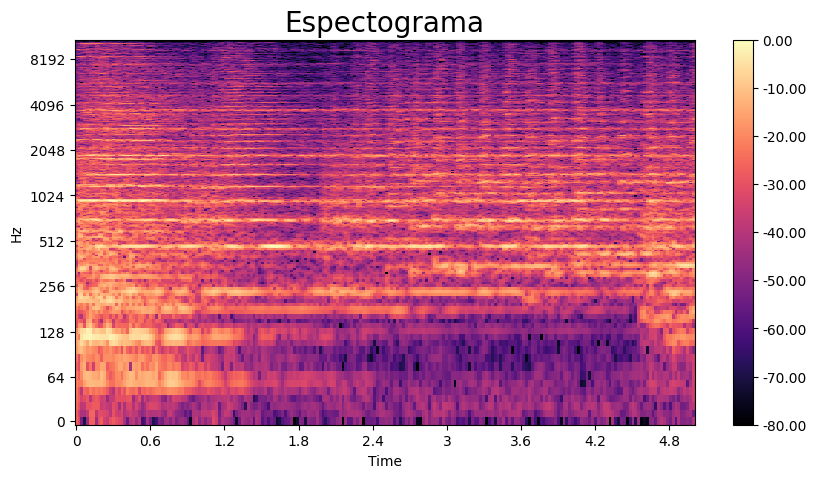

In [13]:
# Criação do espectograma
# Na barra de cores, podemos verificar a correspondencia das cores com a amplitude em decibéis

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)

ax.set_title('Espectograma', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

## Main


Áudio original


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\antho\AppData\Local\Temp\ipykernel_11024\436627835.py:4: SyntaxWarning: invalid escape sequence '\l'
  with open('..\logs\log_audio.csv', 'w', newline='') as arquivo_log:


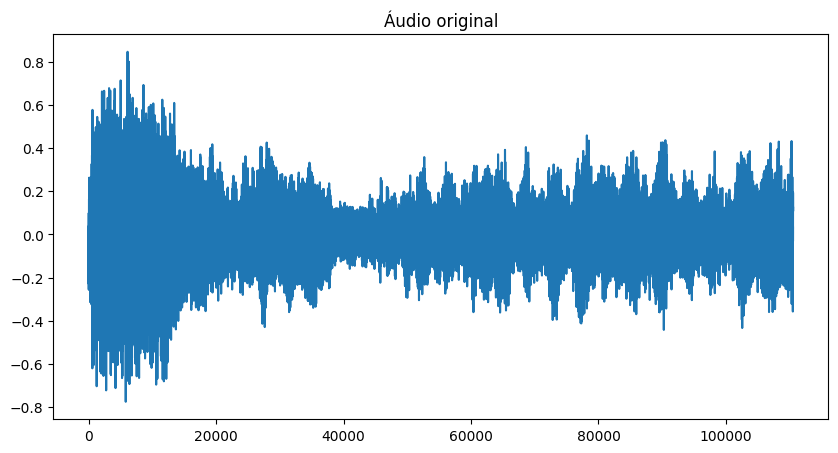

Áudio invertido


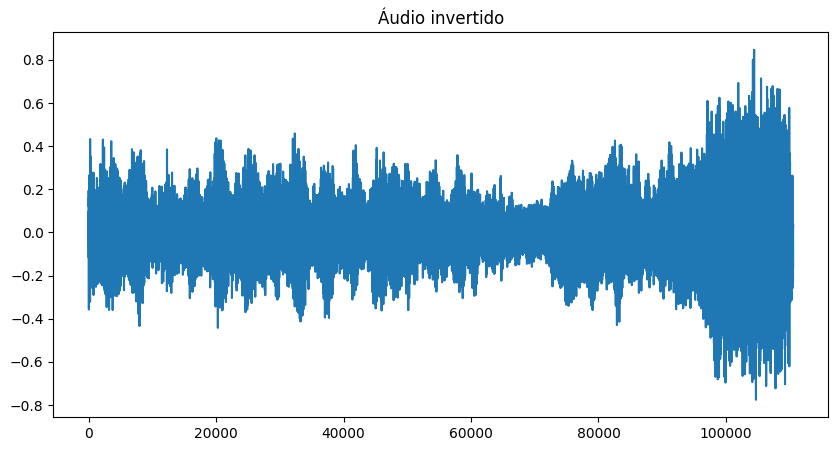

Áudio convoluído


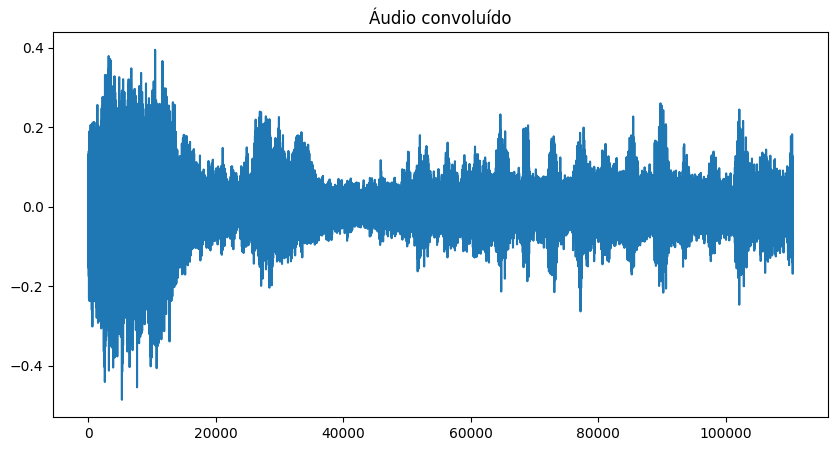

Áudio cortado


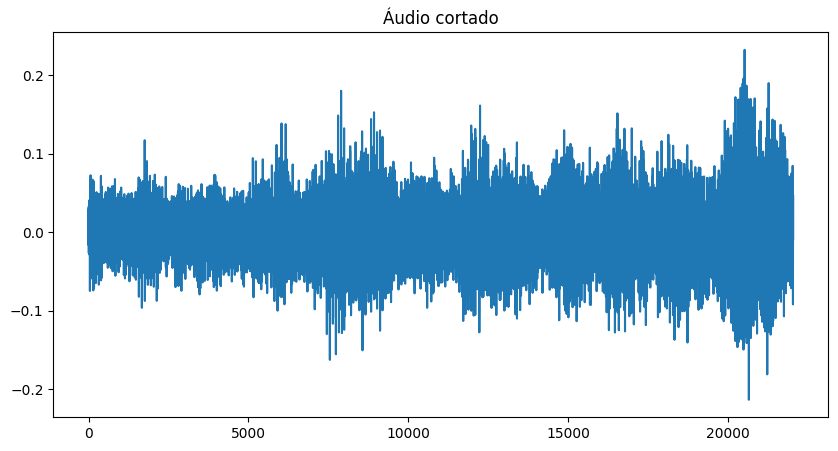

Áudio concatenado


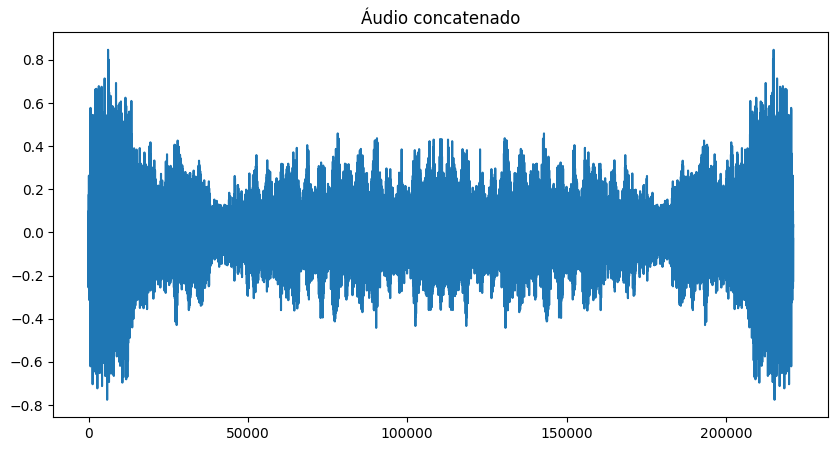

Áudio misturado


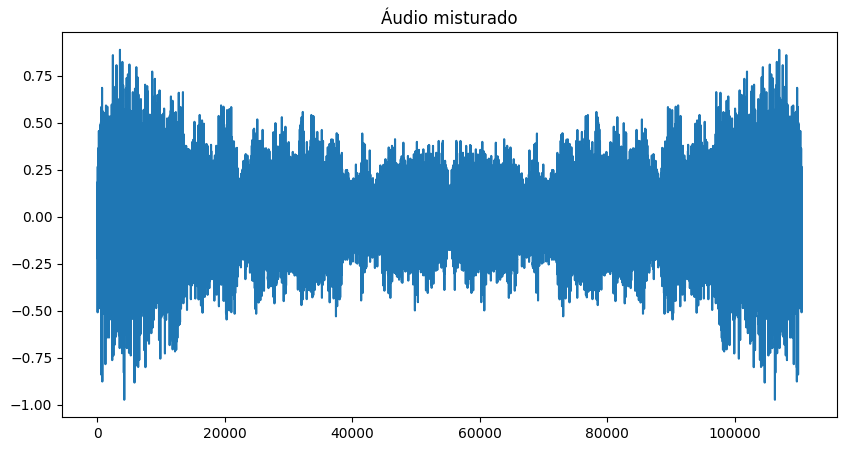

Áudio filtrado


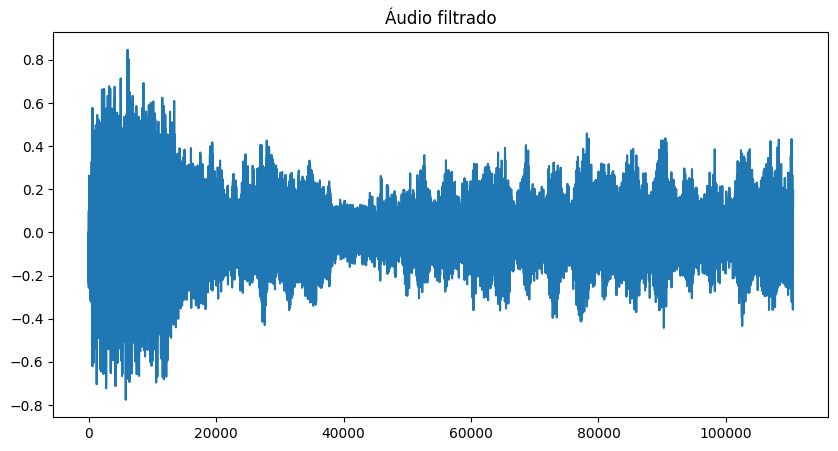

In [14]:
def audio(audio_path, rate):
    return IPython.display.display(IPython.display.Audio(audio_path, rate=rate))

with open('..\logs\log_audio.csv', 'w', newline='') as arquivo_log:
    writer = csv.DictWriter(arquivo_log, fieldnames=['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 'Mensagem de Erro'])
    writer.writeheader()

    # Carregar arquivo de áudio
    path = './audio_test.wav'
    rate, audio_data = ler_arquivo_wav(path, writer)

    print('Áudio original')
    audio(audio_data, rate)
    pd.Series(audio_data).plot(figsize=(10,5), title="Áudio original")
    plt.show()

    print('Áudio invertido')
    audio_invertido = inversao_audio(audio_data, path, writer)
    audio(audio_invertido, rate)
    pd.Series(audio_invertido).plot(figsize=(10,5), title="Áudio invertido")
    plt.show()

    print('Áudio convoluído')
    audio_conv = convolucao_audio(audio_data, path, writer)
    audio(audio_conv, rate)
    pd.Series(audio_conv).plot(figsize=(10,5), title="Áudio convoluído")
    plt.show()

    print('Áudio cortado')
    audio_cortado = recortar_audio(audio_conv, 2, 3, path, writer)
    audio(audio_cortado, rate)
    pd.Series(audio_cortado).plot(figsize=(10,5), title="Áudio cortado")
    plt.show()

    print('Áudio concatenado')
    audio_concatenado = concatenar_audio(audio_data, audio_invertido, path, writer)
    audio(audio_concatenado, rate)
    pd.Series(audio_concatenado).plot(figsize=(10,5), title="Áudio concatenado")
    plt.show()

    print('Áudio misturado')
    audio_misturado = misturar_audio(audio_data, audio_invertido, path, writer)
    audio(audio_misturado, rate)
    pd.Series(audio_misturado).plot(figsize=(10,5), title="Áudio misturado")
    plt.show()

    print('Áudio filtrado')
    audio_filtrado = filtrar_audio(audio_data, path, writer)
    audio(audio_filtrado, rate)
    pd.Series(audio_filtrado).plot(figsize=(10,5), title="Áudio filtrado")
    plt.show()

    

In [15]:
## Exibir arquivo de log

with open('..\logs\log_audio.csv', mode='r') as file:

    csv_reader = csv.reader(file)

    for row in csv_reader:
        print(row)

['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 'Mensagem de Erro']
['2024-03-14 18:04:17', 'Leitura de Arquivo WAV', '26.927', 'audio_test.wav', '940.19140625', 'Sucesso', '']
['2024-03-14 18:04:19', 'Inversão de Áudio', '0.0', 'audio_test.wav', '940.19140625', 'Sucesso', '']
['2024-03-14 18:04:20', 'Convolução de Áudio', '32.914', 'audio_test.wav', '940.19140625', 'Sucesso', '']
['2024-03-14 18:04:22', 'Recorte de Áudio', '0.0', 'audio_test.wav', '940.19140625', 'Sucesso', '']
['2024-03-14 18:04:23', 'Concatenação de Áudio', '0.9970000000000001', 'audio_test.wav', '940.19140625', 'Sucesso', '']
['2024-03-14 18:04:25', 'Mistura de Áudio', '0.998', 'audio_test.wav', '940.19140625', 'Sucesso', '']
['2024-03-14 18:04:26', 'Filtragem de Áudio', '1.0', 'audio_test.wav', '940.19140625', 'Sucesso', '']


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\antho\AppData\Local\Temp\ipykernel_11024\26625152.py:3: SyntaxWarning: invalid escape sequence '\l'
  with open('..\logs\log_audio.csv', mode='r') as file:


## Exemplo de uso
> Criando o arquivo ***log_audio.csv*** para análise 

In [16]:
DATASET_PATH = 'data/mini_speech_commands'

data_dir = pathlib.Path(DATASET_PATH)
if not data_dir.exists():
  tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')

182082353/182082353 ━━━━━━━━━━━━━━━━━━━━ 53s 0us/step


In [18]:
## Algumas verificações 

print("Caminho do dataset de imagens: ")
print(data_dir)

print ()

print("Total de áudios do dataset: ")
image_count = len(list(data_dir.glob('*/*.wav')))
print(image_count)

Caminho do dataset de imagens: 
data\mini_speech_commands

Total de áudios do dataset: 
8000


> Vamos usar apenas a pasta 'go' do conjunto de dados


In [20]:
go_dir = data_dir / 'go/'
go_dir

print("Total de áudios na pasta 'go': ")

image_count = len(list(go_dir.glob('*.wav')))
print(image_count)

Total de áudios na pasta 'go': 
1000


In [22]:
# Definir lista de arquivos de entrada
fmask = str(go_dir / '*.wav')
flist = glob.glob(fmask)

Agora vamos rodar o código principal utilizando a base de dados, com o objetivo de gerar um arquivo de log com várias entradas para análise posterior

In [25]:
# Lista de operações de processamento
operacoes = [inversao_audio, convolucao_audio, recortar_audio, concatenar_audio, misturar_audio, filtrar_audio]

def audio(audio_path, rate):
    return IPython.display.display(IPython.display.Audio(audio_path, rate=rate))

with open('..\logs\log_audio.csv', 'w', newline='') as arquivo_log:
    writer = csv.DictWriter(arquivo_log, fieldnames=['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 'Mensagem de Erro'])
    writer.writeheader()

    for path in flist:

        rate, audio_data = ler_arquivo_wav(path, writer)

        operacao = random.choice(operacoes)
    
        if operacao == inversao_audio:
            audio_invertido = inversao_audio(audio_data, path, writer)
     
        elif operacao == convolucao_audio:
            audio_conv = convolucao_audio(audio_data, path, writer)
       
        elif operacao == recortar_audio:
            audio_cortado = recortar_audio(audio_conv, 2, 3, path, writer)
     
        elif operacao == concatenar_audio:
            audio_concatenado = concatenar_audio(audio_data, audio_invertido, path, writer)
   
        elif operacao == misturar_audio:
            audio_misturado = misturar_audio(audio_data, audio_invertido, path, writer)
      
        elif operacao == filtrar_audio:
            audio_filtrado = filtrar_audio(audio_data, path, writer)
      

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\antho\AppData\Local\Temp\ipykernel_11024\3648123767.py:7: SyntaxWarning: invalid escape sequence '\l'
  with open('..\logs\log_audio.csv', 'w', newline='') as arquivo_log:


Vamos visualizar o arquivo log_audio

In [30]:
df = pd.read_csv('..\logs\log_audio.csv', encoding='latin-1')
df

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\antho\AppData\Local\Temp\ipykernel_11024\3709894011.py:1: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv('..\logs\log_audio.csv', encoding='latin-1')


,Data e Hora,Tipo de Processamento,Tempo de Processamento,Nome do Arquivo,Tamanho do Arquivo,Resultado do Processamento,Mensagem de Erro
0,2024-03-14 18:19:54,Leitura de Arquivo WAV,290.057,004ae714_nohash_0.wav,21.812500,Sucesso,NaN
1,2024-03-14 18:19:54,Convolução de Áudio,30.918,004ae714_nohash_0.wav,21.812500,Sucesso,NaN
2,2024-03-14 18:19:54,Leitura de Arquivo WAV,21.940,0132a06d_nohash_2.wav,31.292969,Sucesso,NaN
3,2024-03-14 18:19:54,Convolução de Áudio,0.998,0132a06d_nohash_2.wav,31.292969,Sucesso,NaN
4,2024-03-14 18:19:54,Leitura de Arquivo WAV,15.003,0137b3f4_nohash_0.wav,31.292969,Sucesso,NaN
...,...,...,...,...,...,...,...
1995,2024-03-14 18:20:08,Convolução de Áudio,0.000,ffa76c4a_nohash_0.wav,31.292969,Sucesso,NaN
1996,2024-03-14 18:20:08,Leitura de Arquivo WAV,2.991,ffd2ba2f_nohash_2.wav,31.292969,Sucesso,NaN
1997,2024-03-14 18:20:08,Concatenação de Áudio,0.000,ffd2ba2f_nohash_2.wav,31.292969,Sucesso,NaN
1998,2024-03-14 18:20:08,Leitura de Arquivo WAV,4.007,ffd2ba2f_nohash_3.wav,31.292969,Sucesso,NaN
